In [1]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
#file_id = '1J05tsCBwdhEwkXygcbpKNztsXA6qErPC'
#downloaded = drive.CreateFile({'id': file_id})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [2]:
!pip install twitterscraper
!pip install vaderSentiment
!pip install langdetect

     |████████████████████████████████| 92kB 5.9MB/s 
  Created wheel for twitterscraper: filename=twitterscraper-1.6.1-cp36-none-any.whl size=11349 sha256=0dc1dfba613be94980ca94306e6d47235de1dc09b6da19ba2f38f8c0ea72d7b0
  Stored in directory: /root/.cache/pip/wheels/1a/50/a0/808fd6df0ac14c168b73874056a1ca52e4d88c0c1ecedd4e48
Successfully built twitterscraper
     |████████████████████████████████| 133kB 4.4MB/s 
     |████████████████████████████████| 983kB 4.7MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=7d8a4a3a89869c5acaca0d34e8c5919441d1401bac2bcf5b7c7466ad0fd94d34
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [3]:
#Importing the relevent libraries
import pandas as pd 
import datetime as dt 
from twitterscraper import query_tweets
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from langdetect import detect 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
begin_date = dt.date(2018,1,1)
end_date = dt.date(2020,3,26)
limit = 100000
lang = 'english'


In [5]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data/
#!cat '/gdrive/My Drive/Morgan Stanley Project/Data and Notebook/pretty_ms_tweets.json'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive/
/gdrive/My Drive/Morgan Stanley Project/CRM_Analysis_Data


In [6]:
#tweets = query_tweets("morganstanley", begindate = begin_date, enddate = end_date, limit = limit, lang = lang)


In [7]:
#Transforming it into a dataframe
#df = pd.DataFrame(t.__dict__ for t in tweets)
#Saving a file
#df.to_csv('TwitterData.csv')

In [14]:
#Importing Various twitter data
#Complaint
df_com = pd.read_json('pretty_ms_tweets_complaint.json')

#Feedback
df_feed = pd.read_json('pretty_ms_tweets_feedback.json')

#Request
df_req = pd.read_json('pretty_ms_tweets_request.json')


In [15]:
df = pd.concat([df_com,df_feed,df_req])

In [16]:
#Sentiment Analysis
#Vader Sentiment

In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
sentiment = df['text'].apply(lambda x: analyzer.polarity_scores(x))

In [19]:
#Inserting the sentiment into the dataframe
df = pd.concat([df, sentiment.apply(pd.Series)],1)

In [20]:
#df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [21]:
df['date'] = df['timestamp'].apply(lambda x: x.date())

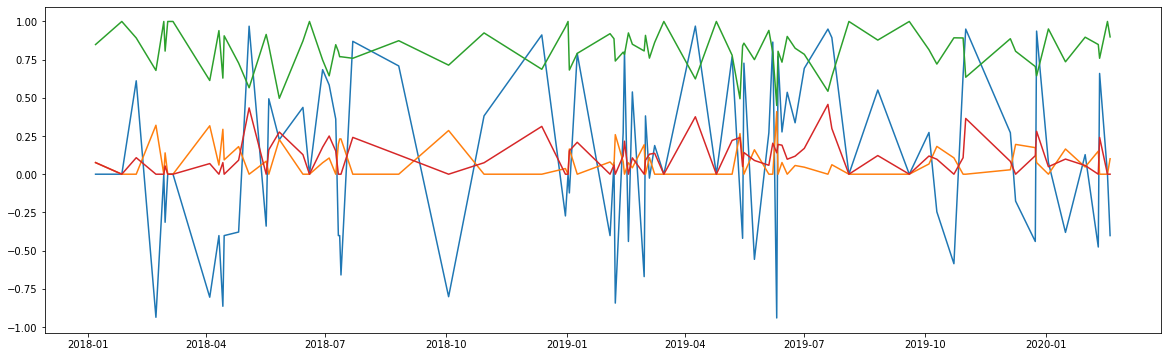

In [22]:
#Plotting the change in sentiment over time
plt.figure(figsize = (20,6))
plt.plot(df.groupby('date').mean()['compound'].index, df.groupby('date').mean()['compound'].values, label = 'com')

plt.plot(df.groupby('date').mean()['neg'].index, df.groupby('date').mean()['neg'].values)
plt.plot(df.groupby('date').mean()['neu'].index, df.groupby('date').mean()['neu'].values)
plt.plot(df.groupby('date').mean()['pos'].index, df.groupby('date').mean()['pos'].values)

In [23]:
df['text'].iloc[0]
#As we can see, several of the tweets captures donot refer to morgan stanley. Hence we need to filter out these tweets

'ouch. though you have to wonder if personal bias is creeping in here, given Adam Jonas @MorganStanley complaints the other day eg "send that tape.."'

In [24]:
Filter = df['text'].apply(lambda x: 'jp' in x.lower())
df_filter = df[Filter]
df_filter.shape
df_filter['text'].iloc[0]

'Love @Amazon hoping they will fix CST @AmazonHelp, stop eavesdropping, stop fake products review, stop cut/paste email responses by e-reps as if they care when complaints sent to jeff@amazon.com\n\nAs Amazon sprawls, its Facebook-like problems mount \n\nhttps://www.wsj.com/articles/amazons-size-is-becoming-a-problemfor-amazon-11557547211?emailToken=354581ce1f69f35bbfa9fabb6c96b4f4wzsQkKcEIR3cHeuOCTE5aoTToBmWpVUyv+juD+d6bDWEg8Z0EPsW1rObIx3loXeLKJsmiTNq31FRCCqUhmGbPSr2dk8GzuCPGWqmjAgDTnI%3D&reflink=article_imessage_share\xa0… @wsjpic.twitter.com/SKuxS96rzc'

Text(0, 0.5, 'Sentiment')

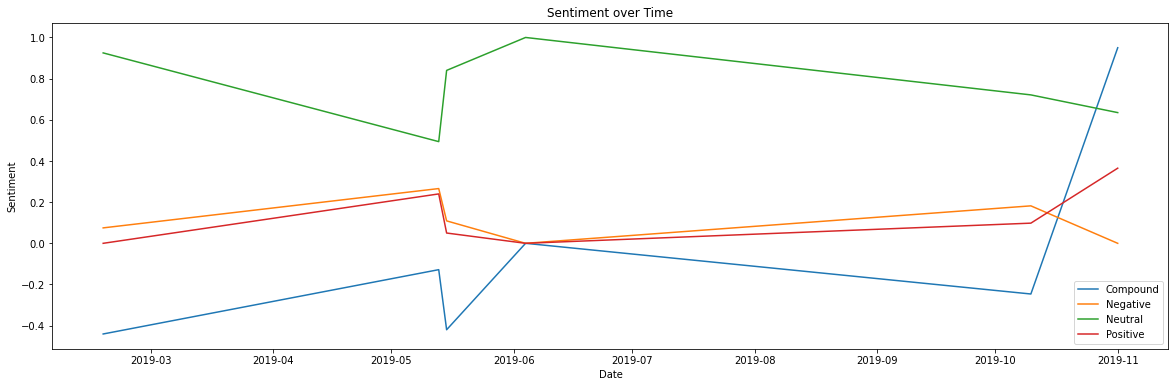

In [25]:
plt.figure(figsize = (20,6))
plt.plot(df_filter.groupby('date').mean()['compound'].index, df_filter.groupby('date').mean()['compound'].values, label = 'Compound')
plt.plot(df_filter.groupby('date').mean()['neg'].index, df_filter.groupby('date').mean()['neg'].values, label = 'Negative')
plt.plot(df_filter.groupby('date').mean()['neu'].index, df_filter.groupby('date').mean()['neu'].values, label = 'Neutral')
plt.plot(df_filter.groupby('date').mean()['pos'].index, df_filter.groupby('date').mean()['pos'].values, label = 'Positive')

plt.legend(loc = 'best')
plt.title('Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')

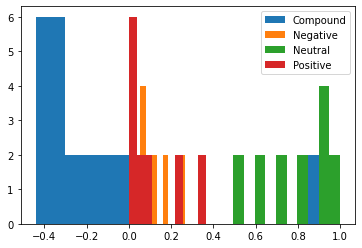

In [26]:

plt.hist(df_filter['compound'].values, label = 'Compound')
plt.hist(df_filter['neg'].values, label = 'Negative')
plt.hist(df_filter['neu'].values, label = 'Neutral')
plt.hist(df_filter['pos'].values, label = 'Positive')

plt.legend(loc = 'best')

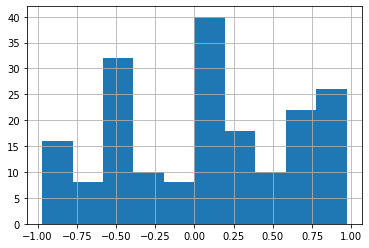

In [27]:
df['compound'].hist()
#df['neg'].hist()
#df['neu'].hist()
#df['pos'].hist()

In [28]:
df.iloc[:,-4:-1]

,neu,pos,compound
0,0.849,0.000,-0.4767
1,0.849,0.000,-0.4767
2,0.899,0.000,-0.4019
3,0.899,0.000,-0.4019
4,0.714,0.000,-0.8020
...,...,...,...
83,0.887,0.084,0.2718
84,0.951,0.049,0.0772
85,0.705,0.121,-0.4404
86,0.805,0.000,-0.1761


In [30]:
#Importing Various twitter data
# all JP files
#Complaint
df_com = pd.read_json('pretty_ms_tweets_complaint.json')

#Feedback
df_feed = pd.read_json('pretty_ms_tweets_feedback.json')

#Request
df_req = pd.read_json('pretty_ms_tweets_request.json')


In [31]:
df = pd.concat([df_com,df_feed,df_req])

In [32]:
#LDAVIS
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     |████████████████████████████████| 1.6MB 4.4MB/s 
     |████████████████████████████████| 552kB 33.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=84a32b6fea3385db2d616fedad150e360666bff540939c96effe52becd35a85a
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=f7ed1e92d6f9cd733850d0908d916421808a0f37b645f7dcfd55d8d06b643990
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [34]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['text'].values)
print(dtm_tf.shape)

(190, 38)


In [35]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

In [36]:
#dtm_tfidf = tfidf_vectorizer.fit_transform(df['text'].values)
#lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
#lda_tfidf.fit(dtm_tfidf)
#pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

In [37]:
sentiment_wm = df['text'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df, sentiment_wm.apply(pd.Series)],1)

In [38]:
df.head()

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,retweets,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url,neg,neu,pos,compound
0,False,[],[],False,True,1,[],1226891812788408322,0,"[{'screen_name': 'MikeMartinez_AN', 'user_id':...",0,chrislemley,ouch. though you have to wonder if personal bi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-10 16:42:22,2020-02-10 16:42:22,1226909280730800128,/chrislemley/status/1226909280730800130,32506384,Chris Lemley,,0.151,0.849,0.0,-0.4767
1,False,[],[],False,True,1,[],1226891812788408322,0,"[{'screen_name': 'MikeMartinez_AN', 'user_id':...",0,chrislemley,ouch. though you have to wonder if personal bi...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-10 16:42:22,2020-02-10 16:42:22,1226909280730800128,/chrislemley/status/1226909280730800130,32506384,Chris Lemley,,0.151,0.849,0.0,-0.4767
2,False,[],[],False,True,1,[],1229752318343684096,0,"[{'screen_name': 'daviddo43706820', 'user_id':...",0,daviddo43706820,Go to finra about james nicholas and see the r...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:42:22,2020-02-19 23:42:22,1230276469730856960,/daviddo43706820/status/1230276469730856961,722172503263551488,david donaldson,,0.101,0.899,0.0,-0.4019
3,False,[],[],False,True,1,[],1229752318343684096,0,"[{'screen_name': 'daviddo43706820', 'user_id':...",0,daviddo43706820,Go to finra about james nicholas and see the r...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-02-19 23:42:22,2020-02-19 23:42:22,1230276469730856960,/daviddo43706820/status/1230276469730856961,722172503263551488,david donaldson,,0.101,0.899,0.0,-0.4019
4,False,"[MorganStanley, racediscrimination]",[],False,False,0,[https://apple.news/A8321NObPTM-PqY7tayO0kA],,0,[],0,BlackAdam32,#MorganStanley is fighting to stop a #racedisc...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2018-10-03 17:46:10,2018-10-03 17:46:10,1047543345348845568,/BlackAdam32/status/1047543345348845570,297233805,C. Michael Haywood,,0.286,0.714,0.0,-0.8020


In [39]:
df_pos = df[df['compound'] >= 0.05]
df_neg = df[df['compound'] <= -0.05]
df_neu = df[( df['compound'] < 0.05 ) & ( df['compound'] > -0.05 )]


In [40]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_pos['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.254546  0.100419       1        1  18.161229
9      0.244673  0.026657       2        1  14.650268
8      0.043642  0.162394       3        1  13.519876
4     -0.005887  0.060923       4        1  13.470466
0     -0.297426  0.062195       5        1   9.727430
1     -0.059062 -0.385826       6        1   8.646122
7     -0.295888  0.117006       7        1   8.583416
2      0.074278 -0.102847       8        1   5.489702
5      0.020561 -0.020460       9        1   3.875746
3      0.020561 -0.020460      10        1   3.875746, topic_info=          Term       Freq      Total Category  logprob  loglift
3         like  10.000000  10.000000  Default  11.0000  11.0000
6      request  15.000000  15.000000  Default  10.0000  10.0000
10  volunteers   9.000000   9.000000  Default   9.0000   9.0000
2         know   8.000000   8.000000  Default   8.0000   8.0000
1        https  10.000000  10.000000  Default   7.0000   7.0000
..         ...        ...        ...      ...      ...      ...
1        https   0.399699  10.223048  Topic10  -2.3979   0.0087
3         like   0.399699  10.364769  Topic10  -2.3979  -0.0050
9      twitter   0.399699  14.576968  Topic10  -2.3979  -0.3461
0          com   0.399699  15.297183  Topic10  -2.3979  -0.3943
6      request   0.399699  15.932030  Topic10  -2.3979  -0.4349

[121 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         1  0.457601         com
0         2  0.196115         com
0         3  0.196115         com
0         4  0.065372         com
1         3  0.782545       https
1         4  0.097818       https
2         5  0.789150        know
3         6  0.868326        like
4         4  0.769885      morgan
5         1  0.724738         pic
5         2  0.120790         pic
6         3  0.125533     request
6         4  0.062767     request
6         5  0.188300     request
6         7  0.564900     request
7         4  0.769885     stanley
8         2  0.648821      thanks
8         4  0.129764      thanks
9         1  0.480210     twitter
9         2  0.274405     twitter
9         3  0.137203     twitter
9         4  0.068601     twitter
10        2  0.325994  volunteers
10        8  0.543323  volunteers, R=11, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 10, 9, 5, 1, 2, 8, 3, 6, 4])

In [41]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neg['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
1     -0.292094+0.000000j  0.022542+0.000000j       1        1  17.533051
9      0.151424+0.000000j -0.049890+0.000000j       2        1  16.141611
8      0.036919+0.000000j  0.271197+0.000000j       3        1  15.151091
6      0.207717+0.000000j -0.135188+0.000000j       4        1  14.241860
5     -0.353181+0.000000j -0.173074+0.000000j       5        1   9.739534
2      0.236651+0.000000j -0.150237+0.000000j       6        1   9.315130
0      0.054621+0.000000j  0.140501+0.000000j       7        1   5.913063
7     -0.014019+0.000000j  0.024716+0.000000j       8        1   3.988220
4     -0.014019+0.000000j  0.024716+0.000000j       9        1   3.988220
3     -0.014019+0.000000j  0.024716+0.000000j      10        1   3.988220, topic_info=          Term       Freq      Total Category  logprob  loglift
5    

In [42]:
dtm_tfidf = tfidf_vectorizer.fit_transform(df_neu['text'].values)
lda_tfidf = LatentDirichletAllocation(n_components=10, random_state=0)
lda_tfidf.fit(dtm_tfidf)
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:1817: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TypeError: ignored

PreparedData(topic_coordinates=                        x                   y  topics  cluster       Freq
topic                                                                    
3      0.184022+0.000000j -0.097220+0.000000j       1        1  35.917846
2     -0.298815+0.000000j  0.079920+0.000000j       2        1  22.856749
0     -0.140442+0.000000j -0.093695+0.000000j       3        1  10.301969
9      0.228196+0.000000j  0.125679+0.000000j       4        1   6.884367
8      0.004507+0.000000j -0.002447+0.000000j       5        1   4.006511
7      0.004507+0.000000j -0.002447+0.000000j       6        1   4.006511
6      0.004507+0.000000j -0.002447+0.000000j       7        1   4.006511
5      0.004507+0.000000j -0.002447+0.000000j       8        1   4.006511
4      0.004507+0.000000j -0.002447+0.000000j       9        1   4.006511
1      0.004507+0.000000j -0.002447+0.000000j      10        1   4.006511, topic_info=      Term      Freq     Total Category  logprob  loglift
3     send 

In [43]:
print(df_pos.shape)
print(df_neg.shape)
print(df_neu.shape)

(84, 25)
(72, 25)
(34, 25)
